In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('exe1_phase1.csv')

# Inspect the dataset
data.head()

,X1,X2,X3,X4,X5
0,6.019355,6.307300,5.423406,5.224410,5.238004
1,6.180088,4.992143,5.797316,5.204532,5.415013
2,5.591546,5.547008,5.336049,5.204776,4.836150
3,6.104278,5.303512,5.359656,4.881226,4.503030
4,5.945447,5.509162,5.048593,5.198052,5.159331


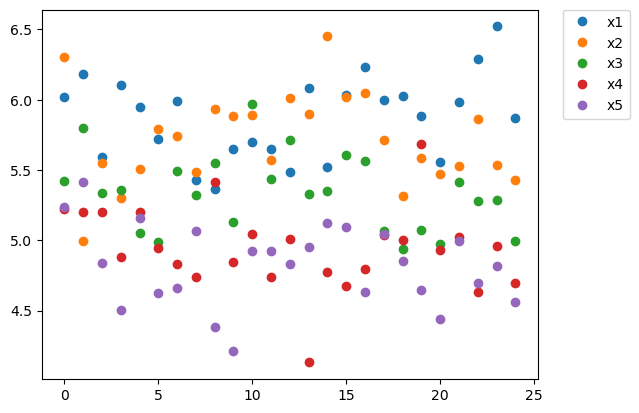

In [2]:
# Make a scatter plot of all the columns against the index
plt.plot(data['X1'], linestyle='none', marker='o', label = 'x1')
plt.plot(data['X2'], linestyle='none', marker='o', label = 'x2')
plt.plot(data['X3'], linestyle='none', marker='o', label = 'x3')
plt.plot(data['X4'], linestyle='none', marker='o', label = 'x4')
plt.plot(data['X5'], linestyle='none', marker='o', label = 'x5')

# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [3]:
# Transpose the dataset and stack the columns
data_stack = data.transpose().melt()

# Remove unnecessary columns
data_stack = data_stack.drop('variable', axis=1)

data_stack.head()


,value
0,6.019355
1,6.307300
2,5.423406
3,5.224410
4,5.238004


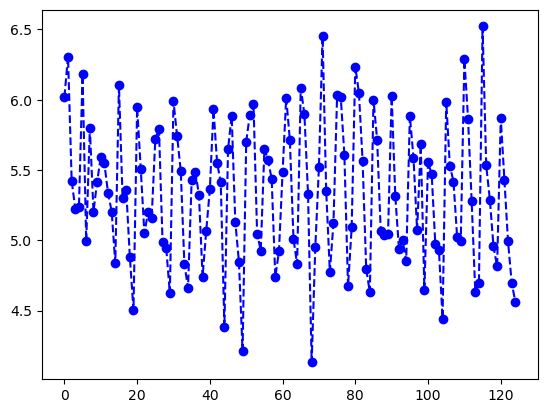

In [4]:
# Plot the data first
plt.plot(data_stack['value'], color='b', linestyle='--', marker='o')
plt.show()

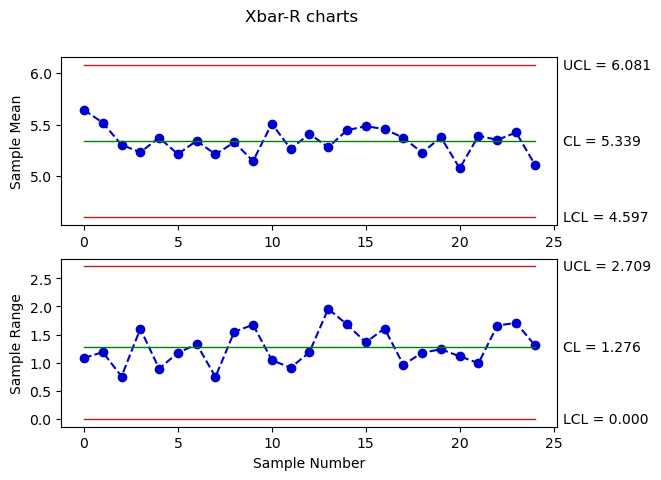

In [5]:
ARL=400
alpha=1/ARL
K_alpha=stats.norm.ppf(1-alpha/2)
data_XR = qda.ControlCharts.XbarR(data,K=K_alpha)

2

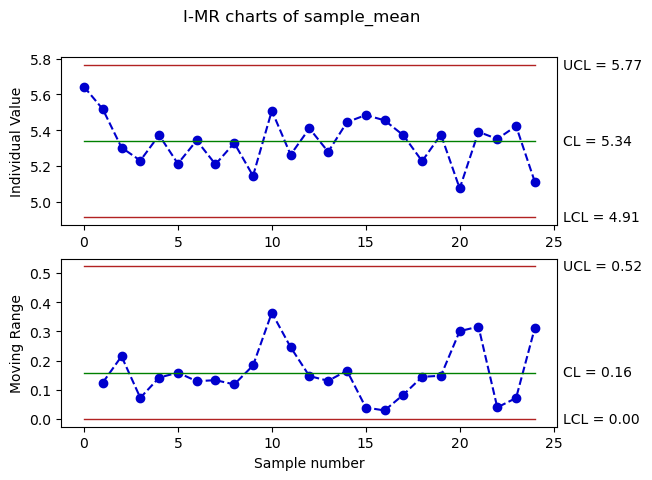

In [6]:
# Create a new dataframe that stores the mean of all the samples
data_Xbar = pd.DataFrame(data_XR['sample_mean'])

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean',K=K_alpha)


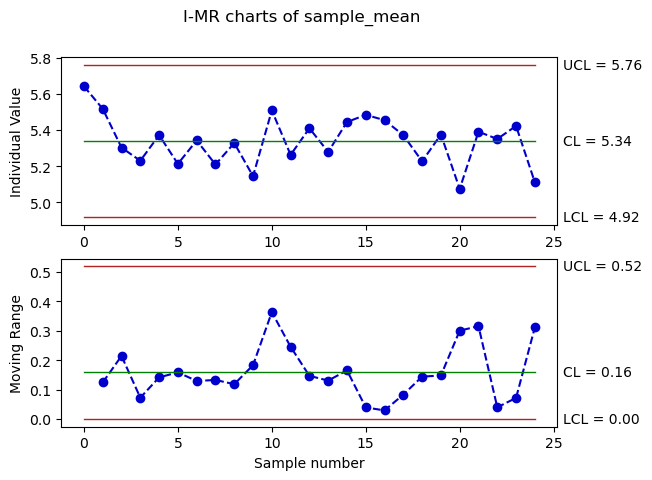

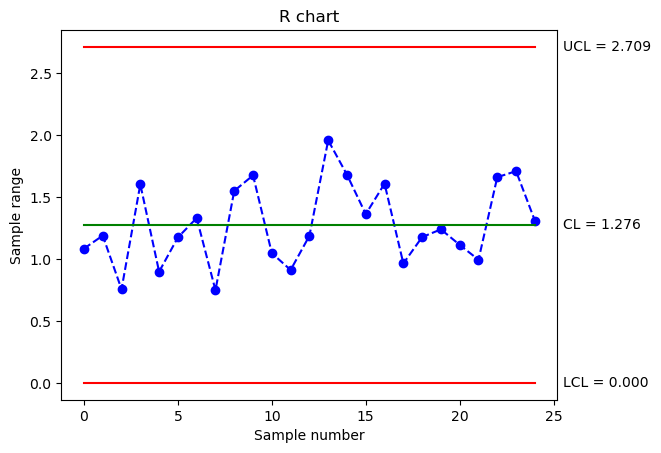

In [7]:
# Design a I-MR-R control chart

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')

# Plot the R chart as well
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()


point 3

In [8]:
data_stack['zone1']=np.tile(np.array([1, 0, 0,0,0]), int(len(data_stack)/5))
data_stack['zone2']=np.tile(np.array([0, 1, 0,0,0]), int(len(data_stack)/5))
data_stack['zone3']=np.tile(np.array([0, 0, 1,0,0]), int(len(data_stack)/5))
data_stack['zone4']=np.tile(np.array([0, 0, 0,1,0]), int(len(data_stack)/5))
data_stack['zone5']=np.tile(np.array([0, 0, 0,0,1]), int(len(data_stack)/5))

In [9]:
X = data_stack[['zone1','zone2', 'zone3','zone4','zone5']]
y = data_stack['value']

In [10]:
import qda
stepwise = qda.StepwiseRegression(add_constant = True, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)

# Fit the model
model = stepwise.fit(y, X)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
 Term     Coef       P-Value
const 5.205392 1.197524e-129
zone1 0.667986  2.072434e-10

MODEL SUMMARY
-------------
       S     R-sq  R-sq(adj)
0.430988 0.280884   0.275038

######################################
### Step 2
-------------------
Forward Selection

COEFFICIENTS
------------
 Term     Coef       P-Value
const 5.035816 9.094725e-132
zone1 0.837562  4.610211e-19
zone2 0.678304  3.181897e-14

MODEL SUMMARY
-------------
       S     R-sq  R-sq(adj)
0.341412 0.552411   0.545073
-------------------
Backward Elimination

No predictor removed.

######################################
### Step 3
-------------------
Forward Selection

COEFFICIENTS
------------
 Term     Coef       P-Value
const 4.884582 9.692650e-126
zone1 0.988797  6.091628e-26
zone2 0.829539  9.416806e-21
zone3 0.453704  8.011269e-09

MODEL SUMMARY
-------------
       S     R-sq

In [11]:
results = model.model_fit
qda.summary(results)

REGRESSION EQUATION
-------------------
value =  + 4.885 const + 0.989 zone1 + 0.830 zone2 + 0.454 zone3

COEFFICIENTS
------------


 Term   Coef  SE Coef  T-Value     P-Value
const 4.8846   0.0422 115.6642 9.6927e-126
zone1 0.9888   0.0731  13.5182  6.0916e-26
zone2 0.8295   0.0731  11.3409  9.4168e-21
zone3 0.4537   0.0731   6.2027  8.0113e-09

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.2986 0.6604      0.652

ANALYSIS OF VARIANCE
---------------------
    Source    DF    Adj SS    Adj MS    F-Value     P-Value
Regression   3.0   20.9817    6.9939    78.4319  3.0317e-28
     const   1.0 1192.9569 1192.9569 13378.2050 9.6927e-126
     zone1   1.0   16.2953   16.2953   182.7410  6.0916e-26
     zone2   1.0   11.4689   11.4689   128.6161  9.4168e-21
     zone3   1.0    3.4308    3.4308    38.4740  8.0113e-09
     Error 121.0   10.7898    0.0892        NaN         NaN
     Total 124.0   31.7715       NaN        NaN         NaN


Shapiro-Wilk test p-value = 0.719


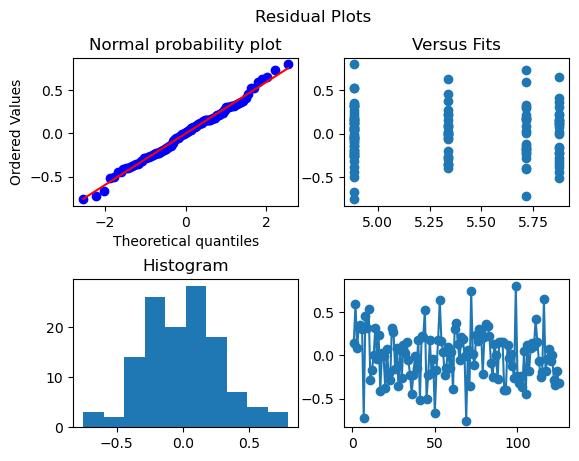

In [12]:
#Check on residuals
residuals = results.resid
fits = results.fittedvalues
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the residuals
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits, residuals)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

Runs test p-value on the residuals = 0.923


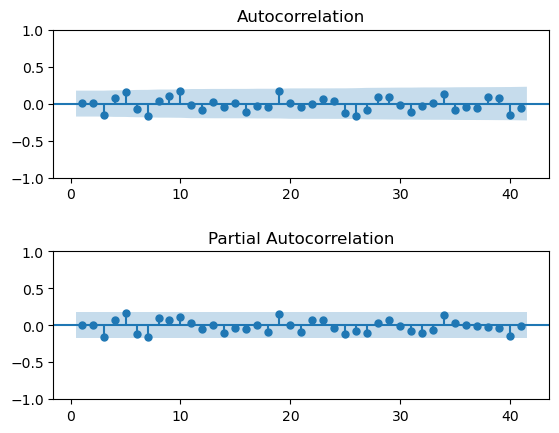

In [13]:
#RANDOMNESS OF FESIDUALS
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs_res = runstest_1samp(residuals, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))

import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data_stack)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data_stack)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

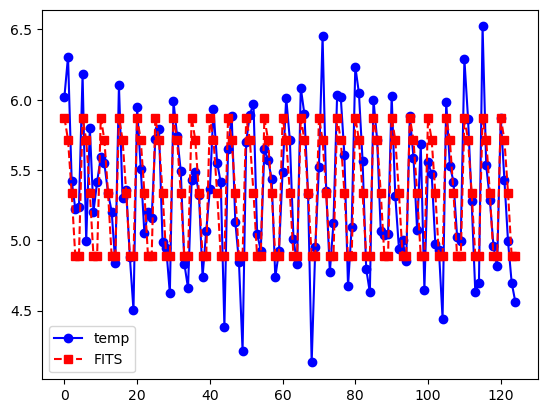

In [14]:
plt.plot(data_stack['value'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(results.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

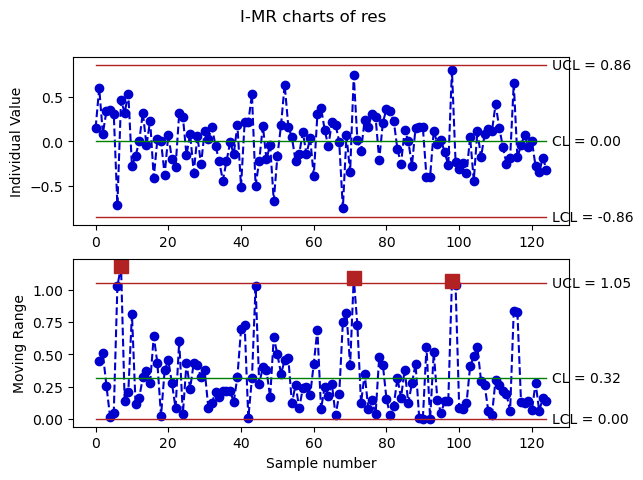

In [15]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(results.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res',K=K_alpha)

Shapiro-Wilk test p-value = 0.000


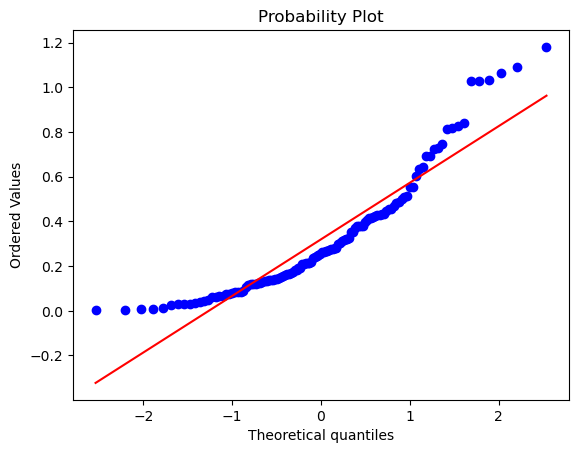

In [16]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(df_SCC_IMR['MR'].iloc[1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(df_SCC_IMR['MR'].iloc[1:], dist="norm", plot=plt)
plt.show()

Lambda = 0.356


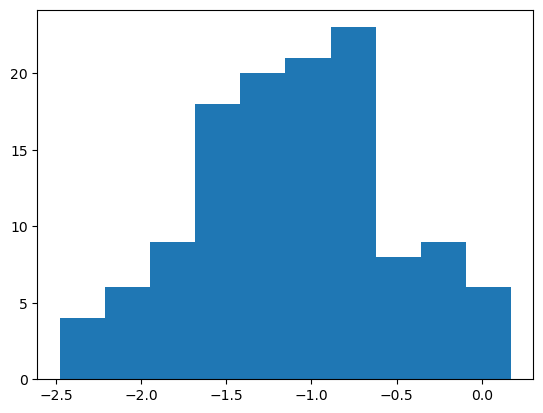

In [17]:
# Box-Cox transformation and return the transformed data
[data_BC, lmbda] = stats.boxcox(df_SCC_IMR['MR'].iloc[1:])

print('Lambda = %.3f' % lmbda)

# Plot a histogram of the transformed data
plt.hist(data_BC)
plt.show()

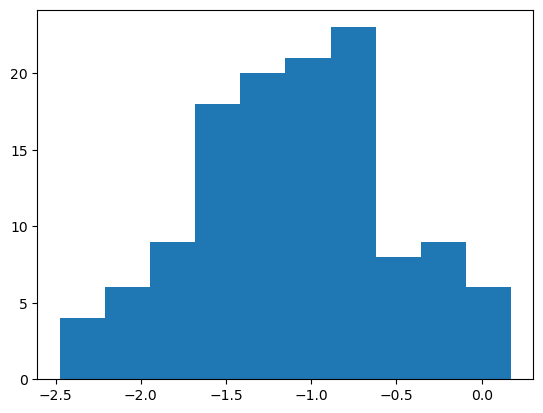

In [18]:
# Use lambda = 0 for Box-Cox transformation and return the transformed data
df_SCC['MR_boxcox'] = stats.boxcox(df_SCC_IMR['MR'], lmbda=0.356)

# Plot a histogram of the transformed data
plt.hist(df_SCC['MR_boxcox'])
plt.show()

Shapiro-Wilk test p-value = 0.671


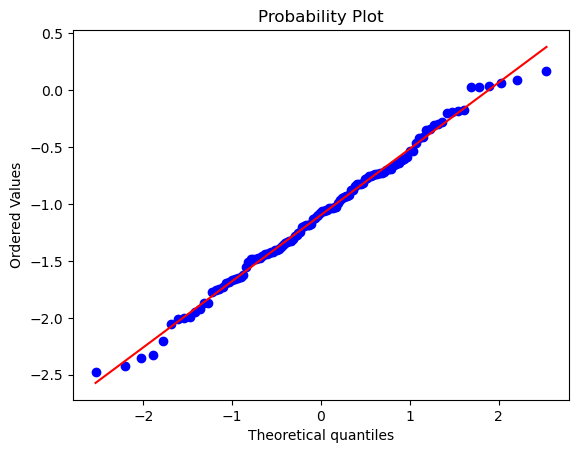

In [19]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(df_SCC['MR_boxcox'].iloc[1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(df_SCC['MR_boxcox'].iloc[1:], dist="norm", plot=plt)
plt.show()

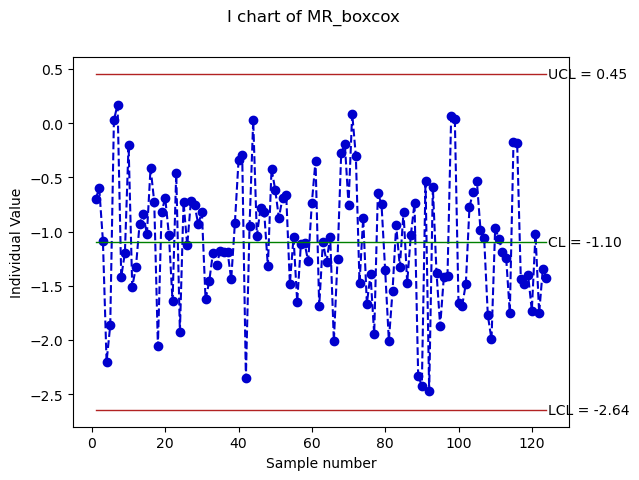

In [20]:
df_MR_boxcox = df_SCC[['MR_boxcox']].iloc[1:]
df_MR_boxcox = qda.ControlCharts.IMR(df_MR_boxcox, 'MR_boxcox',K=K_alpha, plotit=False)

# Plot the I and MR charts
fig, ax = plt.subplots(1, 1)
fig.suptitle(('I chart of MR_boxcox'))
ax.plot(df_MR_boxcox['MR_boxcox'], color='mediumblue', linestyle='--', marker='o')
ax.plot(df_MR_boxcox['I_UCL'], color='firebrick', linewidth=1)
ax.plot(df_MR_boxcox['I_CL'], color='g', linewidth=1)
ax.plot(df_MR_boxcox['I_LCL'], color='firebrick', linewidth=1)
ax.set_ylabel('Individual Value')
ax.set_xlabel('Sample number')
# add the values of the control limits on the right side of the plot
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(df_MR_boxcox['I_UCL'].iloc[0]), verticalalignment='center')
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_CL'].iloc[0], 'CL = {:.2f}'.format(df_MR_boxcox['I_CL'].iloc[0]), verticalalignment='center')
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(df_MR_boxcox['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
ax.plot(df_MR_boxcox['I_TEST1'], linestyle='none', marker='s', color='firebrick', markersize=10)
plt.show()


4

In [21]:
new_obs=pd.read_csv('exe1_phase2.csv')
new_obs.head()

,X1,X2,X3,X4,X5
0,6.2467,6.3208,6.3851,5.7903,4.9128
1,6.8566,6.4053,6.2694,6.0700,5.4983
2,6.9279,6.5992,6.0895,5.9174,5.4189
3,6.7228,6.1361,6.4672,5.5418,5.8477
4,6.4094,6.5679,5.8228,5.2256,5.7126


In [22]:
data_stack_new = new_obs.transpose().melt()

# Remove unnecessary columns
data_stack_new = data_stack_new.drop('variable', axis=1)

data_stack_new.head()

,value
0,6.2467
1,6.3208
2,6.3851
3,5.7903
4,4.9128


In [24]:
# Add the new observations to the dataset
new = data_stack.append(pd.DataFrame(data_stack_new, columns=['value']), ignore_index=True)

new.tail()

,value,zone1,zone2,zone3,zone4,zone5
145,6.4094,NaN,NaN,NaN,NaN,NaN
146,6.5679,NaN,NaN,NaN,NaN,NaN
147,5.8228,NaN,NaN,NaN,NaN,NaN
148,5.2256,NaN,NaN,NaN,NaN,NaN
149,5.7126,NaN,NaN,NaN,NaN,NaN


In [27]:
new['zone1']=np.tile(np.array([1, 0, 0,0,0]), int(len(new)/5))
new['zone2']=np.tile(np.array([0, 1, 0,0,0]), int(len(new)/5))
new['zone3']=np.tile(np.array([0, 0, 1,0,0]), int(len(new)/5))
new['zone4']=np.tile(np.array([0, 0, 0,1,0]), int(len(new)/5))
new['zone5']=np.tile(np.array([0, 0, 0,0,1]), int(len(new)/5))

new.tail()

,value,zone1,zone2,zone3,zone4,zone5
145,6.4094,1,0,0,0,0
146,6.5679,0,1,0,0,0
147,5.8228,0,0,1,0,0
148,5.2256,0,0,0,1,0
149,5.7126,0,0,0,0,1


In [31]:
new_value=4.8846+0.989*new['zone1']+0.83*new['zone2']+0.454*new['zone3']

new_err=new['value']-new_value
error=new_err[125:]

In [37]:
new_data = df_SCC.append(pd.DataFrame(error, columns=['res']), ignore_index=True)
new_data.tail(10)

,res,MR_boxcox
140,0.8492,NaN
141,0.4215,NaN
142,1.1286,NaN
143,0.6572,NaN
144,0.9631,NaN
145,0.5358,NaN
146,0.8533,NaN
147,0.4842,NaN
148,0.3410,NaN
149,0.8280,NaN


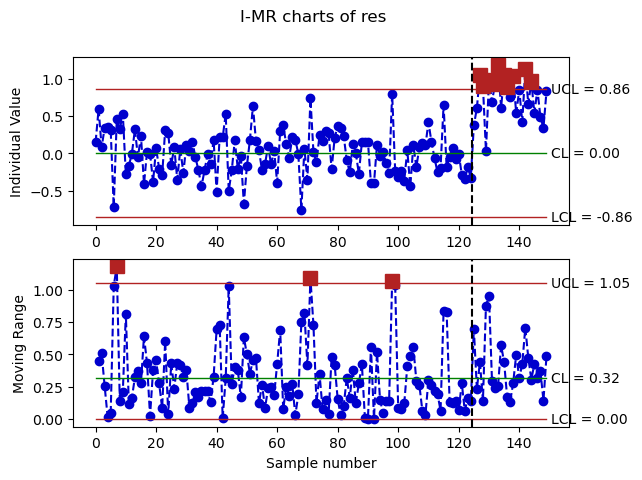

In [38]:
new_data_IMR = qda.ControlCharts.IMR(new_data, 'res',K=K_alpha,subset_size=len(df_SCC))

In [41]:
# Use lambda = 0 for Box-Cox transformation and return the transformed data
df_SCC['MR_boxcox'] = stats.boxcox(new_data_IMR['MR'], lmbda=0.356)

# Plot a histogram of the transformed data
plt.hist(df_SCC['MR_boxcox'])
plt.show()

ValueError: Length of values (150) does not match length of index (125)